In [2]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State

In [3]:
def main_algo(maze: Maze, rewards, eps=0.1, alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        

        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)

        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    return steps_per_iter

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


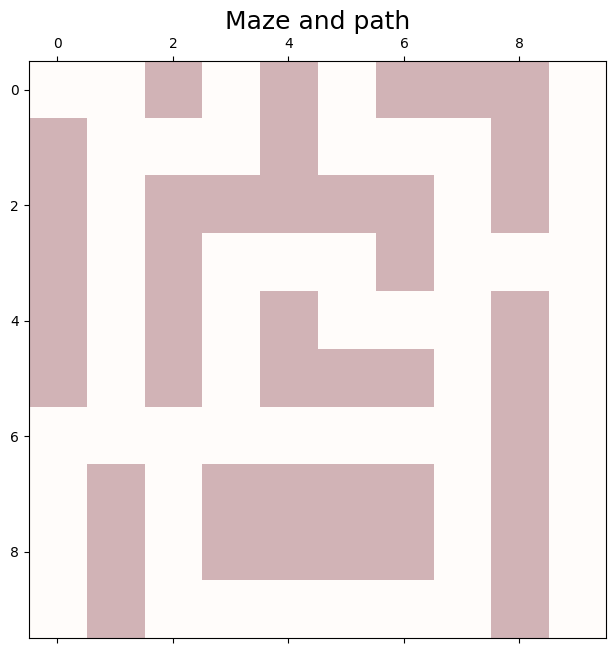

In [18]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[3842, 3246, 776, 1194, 4264, 3334, 706, 526, 422, 798, 154, 488, 1476, 784, 1658, 3480]
Made EGreedy
[4098, 1776, 476, 1642, 6580, 2708, 798, 106, 1900, 1322, 2776, 432, 2456, 696, 2048]
Made EGreedy
[926, 626, 1886, 932, 974, 758, 758, 342, 752, 412, 1778, 630, 1208, 2012, 1400, 2236]
Made EGreedy
[1232, 2338, 1434, 1280, 1408, 2528, 1438, 1562, 812, 1446, 2292, 1428, 444, 786, 2120, 316]
Made EGreedy
[2844, 1322, 2176, 1078, 4496, 538, 1736, 704, 780, 956, 2628, 2266, 1356, 892, 502, 2130]
Made EGreedy
[1134, 628, 1032, 532, 1358, 430, 1706, 574, 428, 692, 1850, 1112, 1830, 1884, 786, 424]
Made EGreedy
[1380, 150, 754, 888, 1070, 2162, 584, 776, 1314, 228, 1692, 1902, 366, 2084, 318, 1134]
Made EGreedy
[174, 2380, 856, 648, 442, 3552, 3402, 712, 702, 2132, 520, 472, 302, 920, 664, 340]
Made EGreedy
[1772, 1650, 1646, 746, 476, 742, 2324, 2394, 1594, 646, 1744, 578, 512, 292, 804, 2042]
Made EGreedy
[748, 422, 296, 1820, 3028,

(0.0, 5000.0)

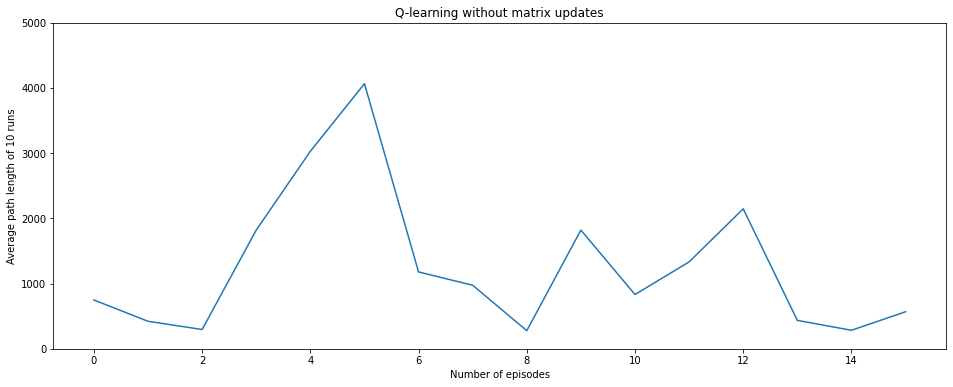

In [95]:
#1.4

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]
eps=0.1
alfa=0.7
gamma=0.9
max_iter=30000
max_episodes=16
steps_per_episode = []
runs_reaching_episode = []


for i in range(10):
    reward_coordinates = set()
    for reward in rewards:
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates.add(State(reward[0], reward[1], 1))

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    steps_per_episode = []
    runs_reaching_episode = []
    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        #learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break
        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append(robot.nr_of_actions_since_reset)
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    print(steps_per_iter)

    for i in range(len(steps_per_iter)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append(0)
    
    for i in range(len(steps_per_iter)):
        steps_per_episode[i] += steps_per_iter[i]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode) / np.array(runs_reaching_episode)

print(y.tolist())
plt.figure(figsize=(16,6))
plt.title("Q-learning without matrix updates")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 5000)

Ready reading maze file ../data/easy_maze.txt
Made EGreedy
[(1682, 0), (9476, 0), (5746, 0), (4878, 0), (96, 0), (4438, 0), (1354, 0), (136, 0), (394, 0), (218, 0), (136, 0), (114, 0), (256, 0), (68, 0), (906, 0)]
Made EGreedy
[(986, 0), (1554, 0), (6174, 0), (2280, 0), (1766, 0), (482, 0), (318, 0), (250, 0), (214, 0), (164, 0), (116, 0), (168, 0), (830, 0), (228, 0), (3666, 0), (40, 0), (234, 0), (28, 0), (84, 0), (274, 0), (946, 0), (52, 0), (28, 0), (144, 0), (28, 0), (44, 0), (28, 0), (26, 0), (24, 0), (26, 0), (24, 0), (24, 0), (24, 0), (22, 0), (22, 0), (24, 0), (24, 0), (26, 0), (24, 0), (22, 0)]
Made EGreedy
[(2474, 0), (2032, 0), (11654, 0), (3716, 0), (3536, 0), (1660, 0)]
Made EGreedy
[(1622, 0), (6942, 0), (1222, 0), (1404, 0), (4228, 0), (460, 0), (4048, 0), (3394, 0), (532, 0), (2038, 0)]
Made EGreedy
[(4316, 0), (330, 0), (2914, 0), (102, 0), (8458, 0), (200, 0), (3344, 0), (128, 0), (908, 0), (1248, 0), (706, 0), (6038, 0)]
Made EGreedy
[(10480, 0), (394, 0), (586, 0),

(0.0, 5000.0)

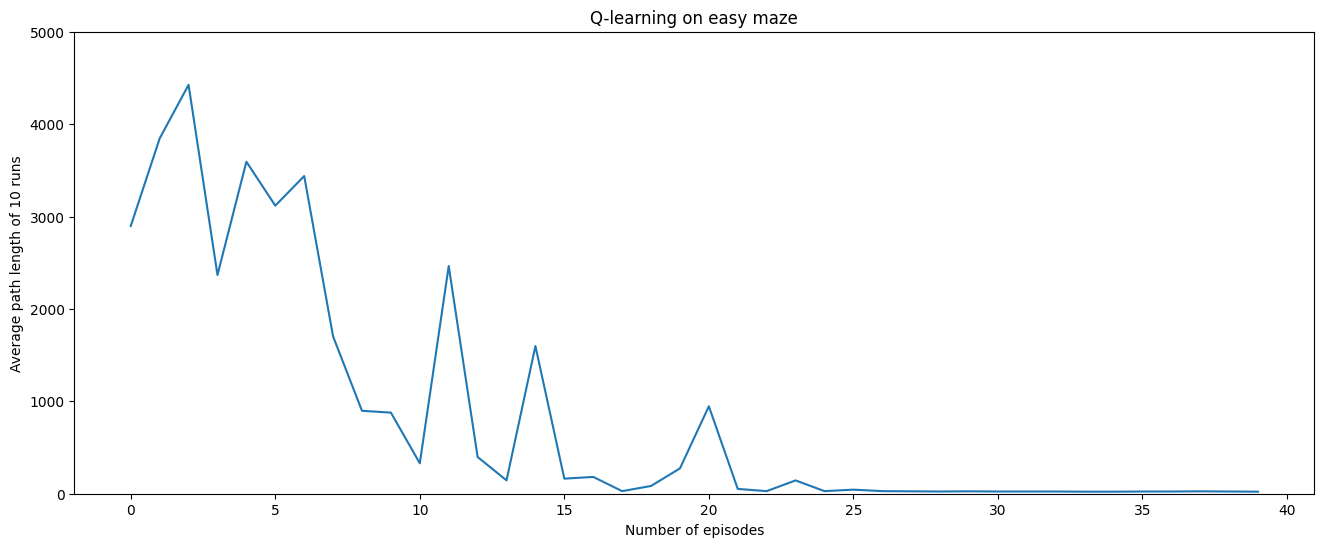

In [11]:
#1.5 and 1.6

# Load the maze
file = "../data/easy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for runNumber in range(10):
    res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)

print(y.tolist())
plt.figure(figsize=(16,6))
plt.title("Q-learning on easy maze")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 5000)

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(228, 0), (2150, 0), (692, 0), (1970, 0), (2448, 0), (344, 0), (228, 0), (176, 0), (164, 0), (562, 0), (322, 0), (68, 0), (84, 0), (68, 0), (146, 0), (168, 0), (220, 0), (172, 0), (98, 0), (210, 0), (270, 0), (152, 0), (42, 0), (74, 0), (92, 0), (54, 0), (36, 0), (70, 0), (32, 0), (48, 0), (36, 0), (28, 0), (56, 0), (32, 0), (24, 0), (38, 0), (30, 0), (46, 0), (32, 0), (42, 0)]
Made EGreedy
[(390, 0), (562, 0), (2740, 0), (354, 0), (652, 0), (734, 0), (742, 0), (322, 0), (108, 0), (102, 0), (78, 0), (308, 0), (446, 0), (68, 0), (138, 0), (78, 0), (186, 0), (48, 0), (198, 0), (70, 0), (106, 0), (62, 0), (90, 0), (80, 0), (48, 0), (34, 0), (36, 0), (38, 0), (34, 0), (30, 0), (36, 0), (38, 0), (26, 0), (26, 0), (24, 0), (30, 0), (28, 0), (28, 0), (28, 0), (30, 0)]
Made EGreedy
[(1304, 0), (332, 0), (752, 0), (726, 0), (1582, 0), (412, 0), (1044, 0), (694, 0), (280, 0), (220, 0), (326, 0), (112, 0), (100, 0), (112, 0), (142, 0), (8

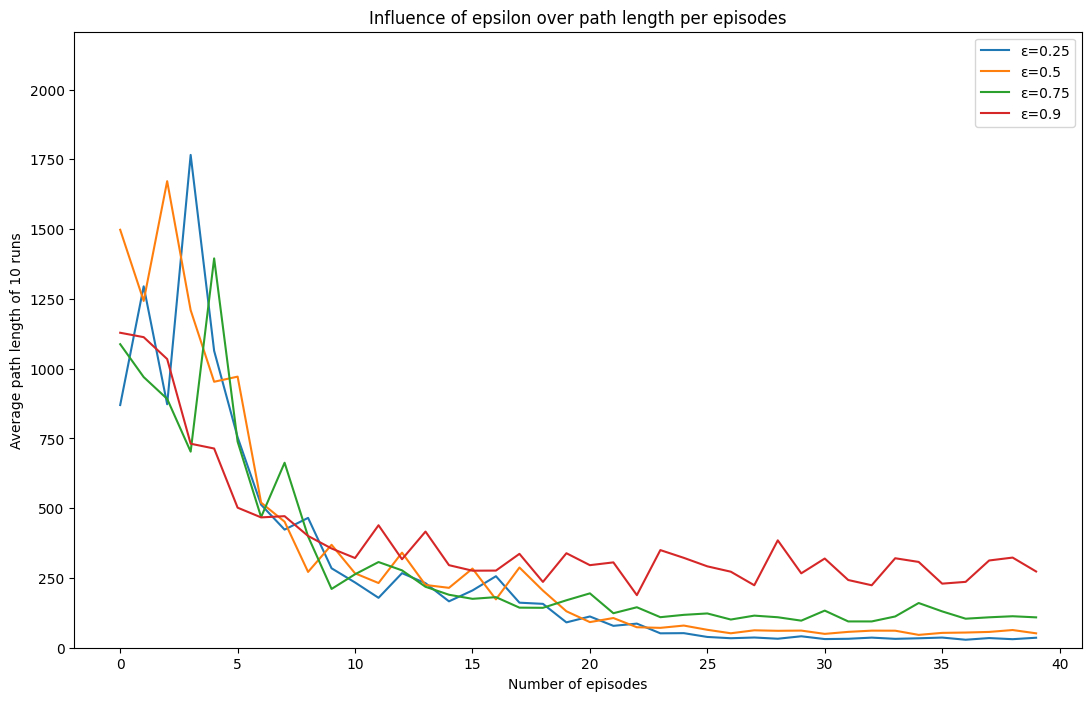

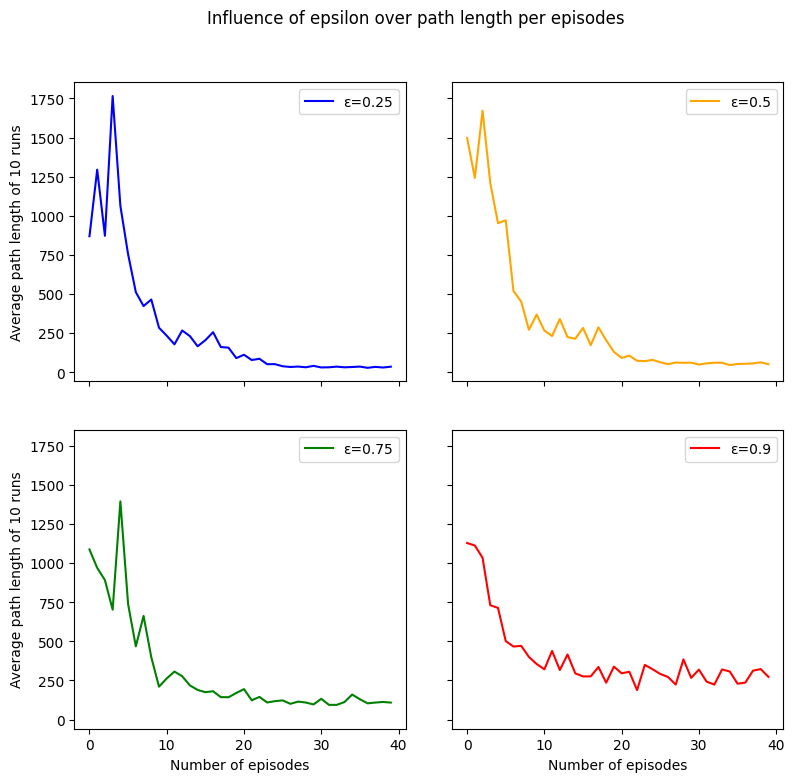

In [16]:
#1.7

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
epsilons = [0.25, 0.5, 0.75, 0.9]

for ind, eps in enumerate(epsilons):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(13, 8))
plt.title("Influence of epsilon over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.25)

print(max_y)

for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

import matplotlib.pyplot as plt
import numpy as np

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((8, 8))
for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, max_y)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(1180, 0), (464, 0), (2424, 0), (558, 0), (458, 0), (450, 0), (454, 0), (666, 0), (764, 0), (192, 0), (164, 0), (154, 0), (270, 0), (244, 0), (142, 0), (134, 0), (204, 0), (540, 0), (248, 0), (96, 0), (118, 0), (286, 0), (114, 0), (82, 0), (30, 0), (30, 0), (28, 0), (36, 0), (28, 0), (24, 0), (26, 0), (28, 0), (30, 0), (34, 0), (24, 0), (24, 0), (24, 0), (24, 0), (24, 0), (26, 0)]
Made EGreedy
[(1766, 0), (1140, 0), (140, 0), (608, 0), (706, 0), (824, 0), (116, 0), (942, 0), (374, 0), (236, 0), (716, 0), (836, 0), (126, 0), (122, 0), (104, 0), (124, 0), (138, 0), (190, 0), (48, 0), (152, 0), (126, 0), (52, 0), (26, 0), (30, 0), (100, 0), (86, 0), (34, 0), (28, 0), (34, 0), (32, 0), (30, 0), (24, 0), (24, 0), (24, 0), (26, 0), (24, 0), (30, 0), (26, 0), (32, 0), (26, 0)]
Made EGreedy
[(418, 0), (578, 0), (748, 0), (290, 0), (1034, 0), (532, 0), (1860, 0), (780, 0), (198, 0), (148, 0), (688, 0), (74, 0), (200, 0), (166, 0), (66, 

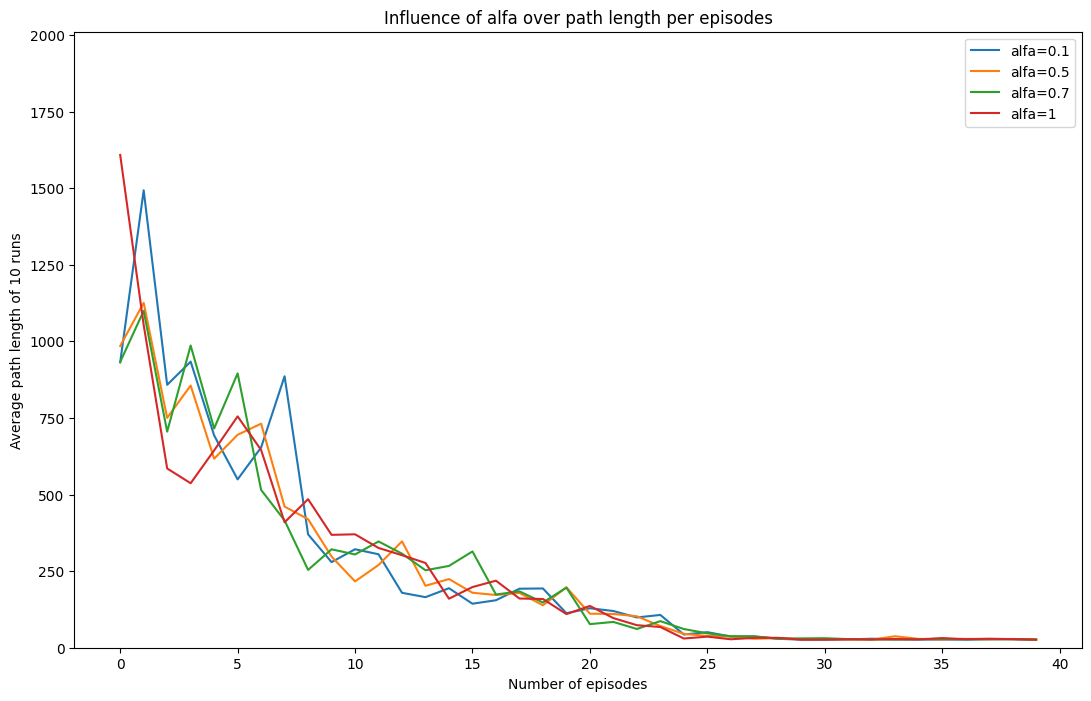

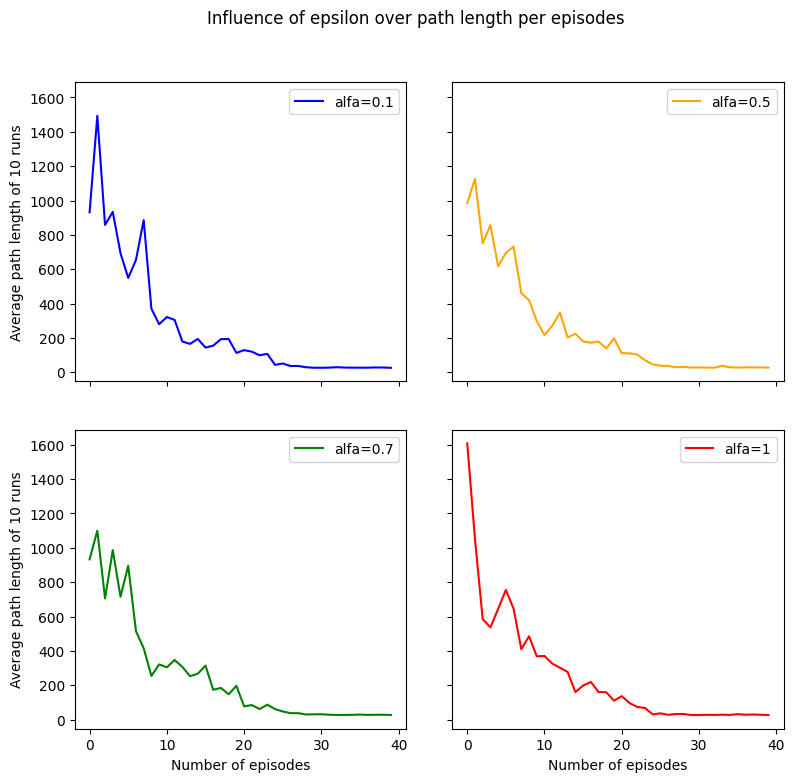

In [17]:
#1.9

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfas = [0.1, 0.5, 0.7, 1]
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for ind, alfa in enumerate(alfas):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(13, 8))
plt.title("Influence of alfa over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.25)

print(max_y)

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

import matplotlib.pyplot as plt
import numpy as np

#print(steps_per_episode)
#print(runs_reaching_episode)

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((8, 8))

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, 1000)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(250, 0), (369, 1), (1105, 1), (407, 1), (1117, 1), (1037, 1), (639, 1), (469, 1), (333, 1), (129, 1), (455, 1), (91, 1), (177, 1), (131, 1), (375, 1), (155, 1), (123, 1), (87, 1), (117, 1), (95, 1), (41, 1), (41, 1), (23, 1), (23, 1), (27, 1), (23, 1), (23, 1), (71, 1), (29, 1), (29, 1), (47, 1), (21, 1), (27, 1), (21, 1), (23, 1), (25, 1), (23, 1), (25, 1), (23, 1), (25, 1), (21, 1), (21, 1), (31, 1), (21, 1), (25, 1), (23, 1), (21, 1), (25, 1), (21, 1), (21, 1), (23, 1), (33, 1), (23, 1), (25, 1), (25, 1), (21, 1), (25, 1), (25, 1), (21, 1), (27, 1), (29, 1), (21, 1), (25, 1), (25, 1), (23, 1), (21, 1), (23, 1), (21, 1), (29, 1), (27, 1), (23, 1), (23, 1), (21, 1), (25, 1), (25, 1), (23, 1), (25, 1), (25, 1), (21, 1), (25, 1), (25, 1), (21, 1), (21, 1), (25, 1), (21, 1), (27, 1), (27, 1), (23, 1), (27, 1), (21, 1), (25, 1), (27, 1), (23, 1), (23, 1), (25, 1), (21, 1), (27, 1), (27, 1), (23, 1), (21, 1), (21, 1), (23, 1), (23

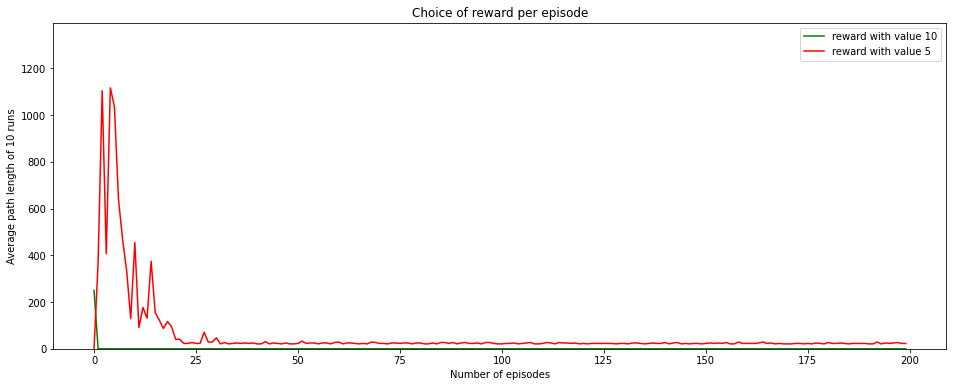

In [99]:
#1.3.10
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
#maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 4
start_eps = 0.1


for runNumber in range(1):
    res = main_algo(alfa=alfa, gamma=gamma, eps=start_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.25)

print(max_y)
plt.figure(figsize=(16,6))
plt.title("Choice of reward per episode")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
for i in range(len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


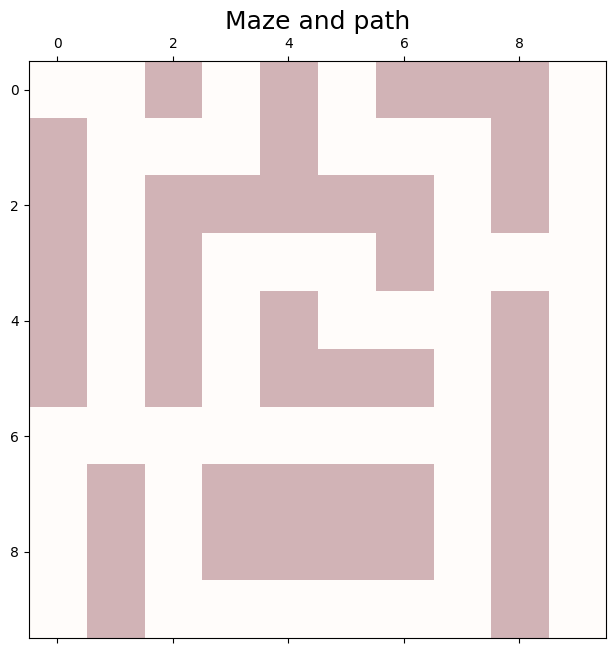

Made EGreedy
[(535, 1), (1015, 1), (961, 1), (1572, 0), (581, 1), (179, 1), (1389, 1), (100, 0), (352, 0), (385, 1), (387, 1), (541, 1), (810, 0), (447, 1), (516, 0), (201, 1), (194, 0), (257, 1), (210, 0), (389, 1), (325, 1), (313, 1), (137, 1), (119, 1), (178, 0), (146, 0), (64, 0), (157, 1), (173, 1), (133, 1), (184, 0), (154, 0), (200, 0), (204, 0), (344, 0), (406, 0), (157, 1), (138, 0), (277, 1), (82, 0), (132, 0), (199, 1), (158, 0), (176, 0), (126, 0), (132, 0), (96, 0), (70, 0), (74, 0), (101, 1), (193, 1), (128, 0), (144, 0), (230, 0), (127, 1), (127, 1), (200, 0), (58, 0), (50, 0), (37, 1), (94, 0), (50, 0), (158, 0), (76, 0), (50, 0), (88, 0), (41, 1), (162, 0), (66, 0), (109, 1), (60, 0), (69, 1), (78, 0), (42, 0), (74, 0), (128, 0), (84, 0), (68, 0), (76, 0), (54, 0), (84, 0), (50, 0), (80, 0), (76, 0), (70, 0), (62, 0), (74, 0), (68, 0), (54, 0), (50, 0), (38, 0), (116, 0), (98, 0), (64, 0), (34, 0), (82, 0), (56, 0), (64, 0), (54, 0), (52, 0), (111, 1), (58, 0), (51, 1)

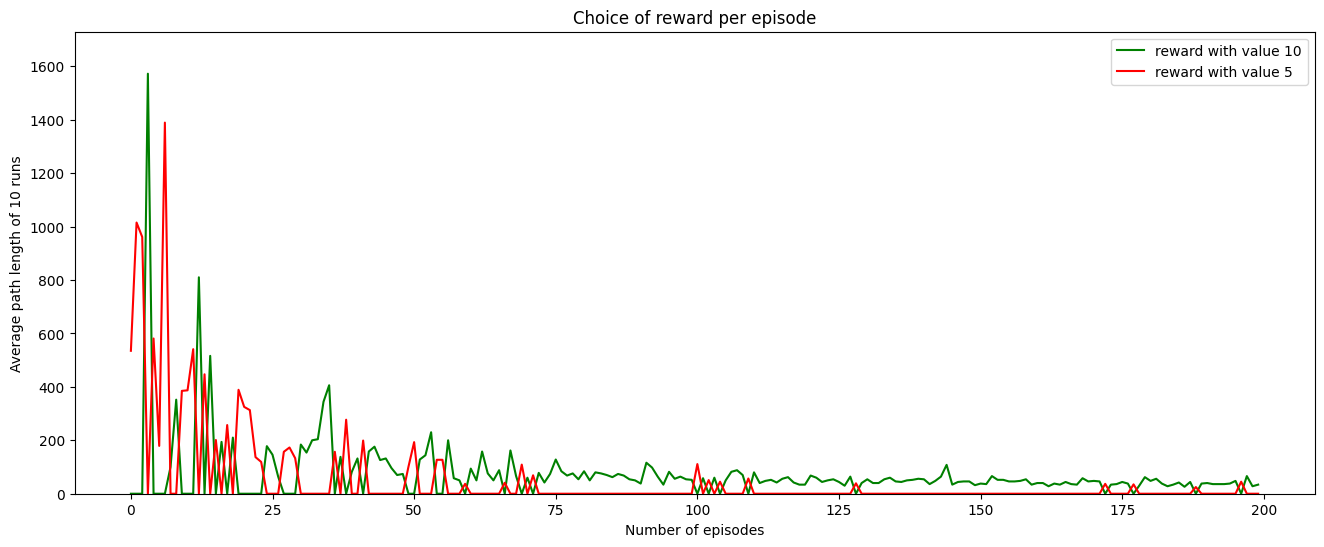

In [23]:
#1.3.11
def mod_algo(maze: Maze, rewards, start_eps=0.1, min_eps=0.1, mult_eps=0.9,alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    eps = start_eps

    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

            eps *= mult_eps
            eps = max(eps, min_eps)


    return steps_per_iter

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 2
start_eps = 1
min_eps = 0.2
mult_eps = 0.995


for runNumber in range(1):
    res = mod_algo(alfa=alfa, gamma=gamma, start_eps=start_eps, min_eps=min_eps, mult_eps=mult_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.1)

print(max_y)

plt.figure(figsize=(16,6))
plt.title("Choice of reward per episode")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
for i in range(len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


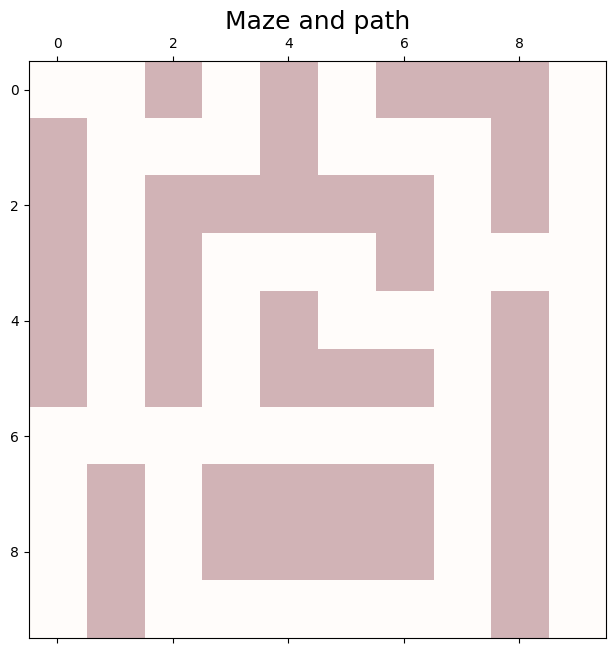

Made EGreedy
[(1239, 1), (499, 1), (915, 1), (893, 1), (319, 1), (195, 1), (578, 0), (261, 1), (228, 0), (299, 1), (247, 1), (435, 1), (125, 1), (104, 0), (367, 1), (404, 0), (201, 1), (119, 1), (227, 1), (226, 0), (70, 0), (323, 1), (97, 1), (409, 1), (309, 1), (213, 1), (179, 1), (59, 1), (357, 1), (237, 1), (387, 1), (105, 1), (212, 0), (163, 1), (211, 1), (152, 0), (222, 0), (143, 1), (93, 1), (127, 1), (69, 1), (77, 1), (99, 1), (87, 1), (69, 1), (151, 1), (102, 0), (87, 1), (183, 1), (167, 1), (99, 1), (73, 1), (93, 1), (153, 1), (172, 0), (95, 1), (81, 1), (118, 0), (67, 1), (37, 1), (106, 0), (98, 0), (104, 0), (44, 0), (57, 1), (96, 0), (80, 0), (99, 1), (70, 0), (63, 1), (112, 0), (138, 0), (60, 0), (61, 1), (150, 0), (40, 0), (79, 1), (71, 1), (80, 0), (55, 1), (88, 0), (83, 1), (103, 1), (67, 1), (62, 0), (64, 0), (102, 0), (78, 0), (48, 0), (70, 0), (73, 1), (52, 0), (77, 1), (71, 1), (68, 0), (70, 0), (82, 0), (74, 0), (108, 0), (60, 0), (58, 0), (30, 0), (49, 1), (66, 0)

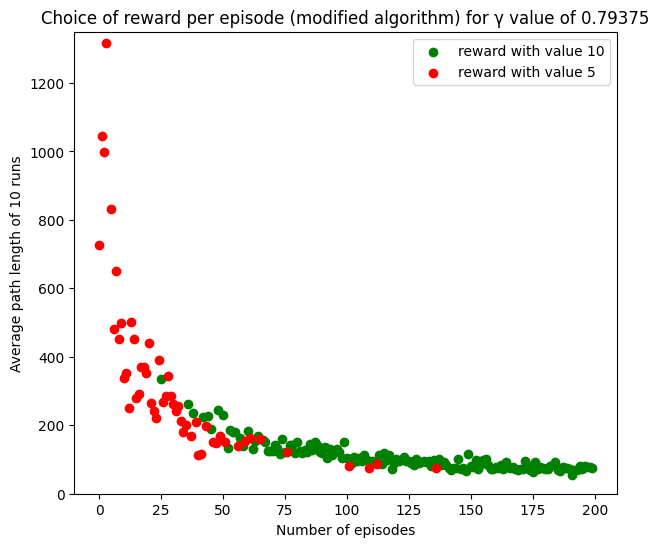

In [28]:
#1.3.12
def mod_algo(maze: Maze, rewards, start_eps=0.1, min_eps=0.1, mult_eps=0.9,alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    eps = start_eps

    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

            eps *= mult_eps
            eps = max(eps, min_eps)


    return steps_per_iter

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.79375
max_episodes = 200
max_iterations = 30000 * 2
start_eps = 1
min_eps = 0.2
mult_eps = 0.995

for runNumber in range(10):
    res = mod_algo(alfa=alfa, gamma=gamma, start_eps=start_eps, min_eps=min_eps, mult_eps=mult_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)

    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
actual_y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.25)
    actual_y += np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

print(max_y)
plt.figure(figsize=(7,6))
plt.title("Choice of reward per episode (modified algorithm) for γ value of " + str(gamma))
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')

y_best = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)
x_index = np.zeros(len(runs_reaching_episode))
for i in range(1, len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)
    
    for j in range(len(x)):
        if y_best[j] < y[j]:
            x_index[j] = i
            y_best[j] = y[j]

for i in range(len(rewards)):
    x_draw = []
    y_draw = []
    for j in range(len(runs_reaching_episode)):
        if x_index[j] == i:
            x_draw.append(j)
            y_draw.append(actual_y[j])

    print(y_draw)
    plt.scatter(x_draw, y_draw, label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y * 1.1)
plt.legend()